In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
dfhead = pd.read_csv('NBAFutures1.csv')
dftail = pd.read_csv('NBAFuturesTest1.csv')
df = dfhead.append(dftail, ignore_index = True)
df.head()

,Unnamed: 0,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
0,0,Kareem Abdul-Jabbar,1980,C,32,LAL,82,38.3,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
1,1,Kareem Abdul-Jabbar,1981,C,33,LAL,80,37.2,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
2,2,Kareem Abdul-Jabbar,1982,C,34,LAL,76,35.2,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
3,3,Kareem Abdul-Jabbar,1983,C,35,LAL,79,32.3,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
4,4,Kareem Abdul-Jabbar,1984,C,36,LAL,80,32.8,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df = df[['Player','Age','PTS','TRB','AST','STL','BLK','PTS2','TRB2','AST2','STL2','BLK2']]

In [79]:
#Stationarize?
#Try to predict Diffs
#Then just add

In [80]:
dum1 = pd.get_dummies(df['Pos'])
dum2 = pd.get_dummies(df['Tm'])
df1 = pd.concat([df, dum1, dum2], axis=1)
df1 = df1.drop(['Pos','Tm'], axis=1)
df1 = df1.set_index('Player')
df1.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,SAC,SAS,SDC,SEA,TOR,TOT,UTA,VAN,WAS,WSB
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0,0,0,0,0,0,0,0,0,0
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df2 = df.drop(['Pos','Tm'], axis=1)
df2 = df2.set_index('Player')
df2.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,STL,BLK,TOV,PF,PTS,PTS2,TRB2,AST2,STL2,BLK2
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,1.0,3.4,3.6,2.6,24.8,26.2,10.3,3.4,0.7,2.9
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0.7,2.9,3.1,3.1,26.2,23.9,8.7,3.0,0.8,2.7
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0.8,2.7,3.0,2.9,23.9,21.8,7.5,2.5,0.8,2.2
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0.8,2.2,2.5,2.8,21.8,21.5,7.3,2.6,0.7,1.8
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0.7,1.8,2.8,2.6,21.5,22.0,7.9,3.2,0.8,2.1


In [82]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['PTS2','TRB2','AST2','STL2','BLK2']
for du in dum:
    cols.remove(du)

In [83]:
cols_at_end = ['PTS2','BLK2','STL2','AST2','TRB2']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,TOT,UTA,VAN,WAS,WSB,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,0,0,0,0,0,26.2,2.9,0.7,3.4,10.3
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0,0,0,0,0,23.9,2.7,0.8,3.0,8.7
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0,0,0,0,0,21.8,2.2,0.8,2.5,7.5
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0,0,0,0,0,21.5,1.8,0.7,2.6,7.3
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0,0,0,0,0,22.0,2.1,0.8,3.2,7.9


In [84]:
df1['PTS2'] = df1['PTS2'] - df1['PTS']
df1['BLK2'] = df1['BLK2'] - df1['BLK']
df1['STL2'] = df1['STL2'] - df1['STL']
df1['AST2'] = df1['AST2'] - df1['AST']
df1['TRB2'] = df1['TRB2'] - df1['TRB']
df1.head()

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,TOT,UTA,VAN,WAS,WSB,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,1980,32,82,38.3,10.2,16.9,0.0,0.0,10.2,16.9,...,0,0,0,0,0,1.4,-0.5,-0.3,-1.1,-0.5
Kareem Abdul-Jabbar,1981,33,80,37.2,10.5,18.2,0.0,0.0,10.5,18.2,...,0,0,0,0,0,-2.3,-0.2,0.1,-0.4,-1.6
Kareem Abdul-Jabbar,1982,34,76,35.2,9.9,17.1,0.0,0.0,9.9,17.1,...,0,0,0,0,0,-2.1,-0.5,0.0,-0.5,-1.2
Kareem Abdul-Jabbar,1983,35,79,32.3,9.1,15.5,0.0,0.0,9.1,15.5,...,0,0,0,0,0,-0.3,-0.4,-0.1,0.1,-0.2
Kareem Abdul-Jabbar,1984,36,80,32.8,9.0,15.5,0.0,0.0,9.0,15.5,...,0,0,0,0,0,0.5,0.3,0.1,0.6,0.6


In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc1 = StandardScaler()
for col in cols:
    df1[[col]] = sc1.fit_transform(df1[[col]])
sc2 = StandardScaler()
df1[['PTS2']] = sc2.fit_transform(df1[['PTS2']])    
sc3 = StandardScaler()
df1[['BLK2']] = sc3.fit_transform(df1[['BLK2']])
sc4 = StandardScaler()
df1[['STL2']] = sc4.fit_transform(df1[['STL2']])
sc5 = StandardScaler()
df1[['AST2']] = sc5.fit_transform(df1[['AST2']])
sc6 = StandardScaler()
df1[['TRB2']] = sc6.fit_transform(df1[['TRB2']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler

,Year,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,...,TOT,UTA,VAN,WAS,WSB,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,-1.898146,1.407294,0.994375,1.643493,2.921600,1.954709,-0.724465,-0.788993,3.303825,2.479137,...,-0.33183,-0.186758,-0.06708,-0.139642,-0.123415,0.514424,-1.618625,-0.764900,-0.948144,-0.167668
Kareem Abdul-Jabbar,-1.809213,1.662855,0.905152,1.530676,3.053270,2.231069,-0.724465,-0.788993,3.443133,2.785742,...,-0.33183,-0.186758,-0.06708,-0.139642,-0.123415,-0.452192,-0.575075,0.434415,-0.280665,-0.849357
Kareem Abdul-Jabbar,-1.720280,1.918416,0.726708,1.325552,2.789929,1.997226,-0.724465,-0.788993,3.164517,2.526307,...,-0.33183,-0.186758,-0.06708,-0.139642,-0.123415,-0.399943,-1.618625,0.134586,-0.376020,-0.601470
Kareem Abdul-Jabbar,-1.631346,2.173977,0.860541,1.028123,2.438808,1.657090,-0.724465,-0.788993,2.793029,2.148947,...,-0.33183,-0.186758,-0.06708,-0.139642,-0.123415,0.070303,-1.270775,-0.165243,0.196105,0.018247
Kareem Abdul-Jabbar,-1.542413,2.429538,0.905152,1.079404,2.394917,1.657090,-0.724465,-0.788993,2.746593,2.148947,...,-0.33183,-0.186758,-0.06708,-0.139642,-0.123415,0.279301,1.164174,0.434415,0.672876,0.514021


In [86]:
df3 = df1[0:len(dfhead)]
df4 = df1[len(dfhead):]

In [87]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [69], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [69], axis=1)
test_x=tests[0]
test_y=tests[1]

In [88]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [89]:
test_y.tail()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Derrick White,1.899037,1.859874,2.533216,3.342791,1.505568
C.J. Williams,-0.608941,-0.922925,-1.064729,-0.185311,-0.477527
D.J. Wilson,1.402667,1.512024,1.034072,1.054292,2.683031
Guerschon Yabusele,0.122553,0.120625,0.434415,0.005397,-0.043725
Ante Zizic,1.219793,0.120625,0.434415,0.768230,2.311200


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


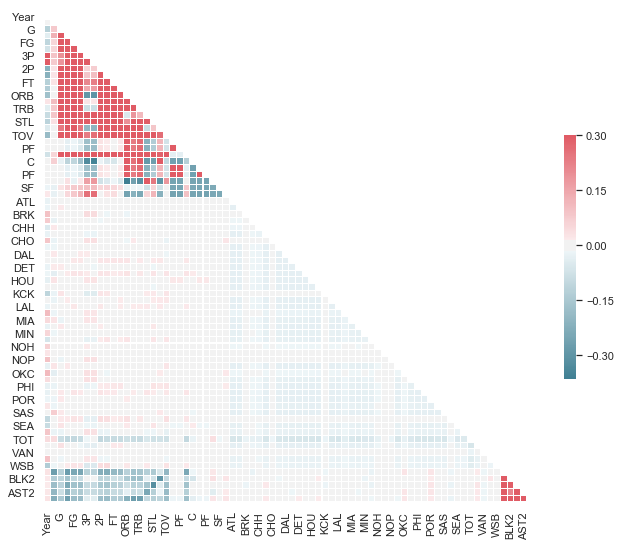

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(train_x.values, train_y.PTS2.values)

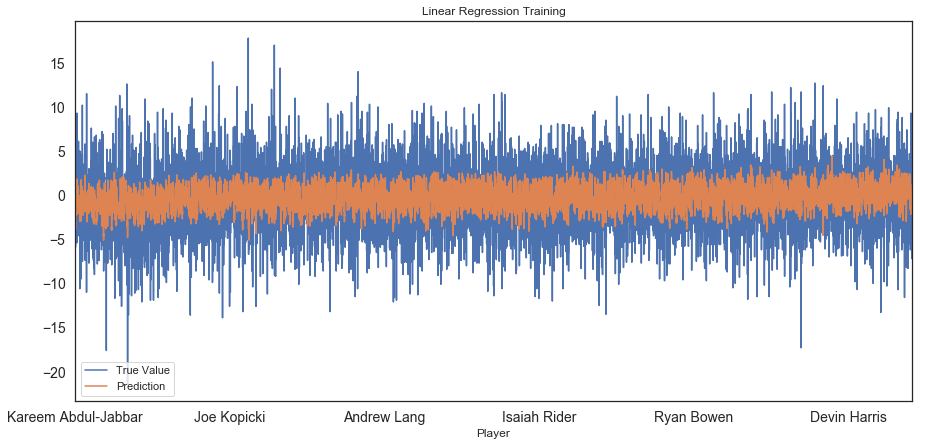

adj train r^2 = 0.15439127303107258
train mse = 9.27470985923593


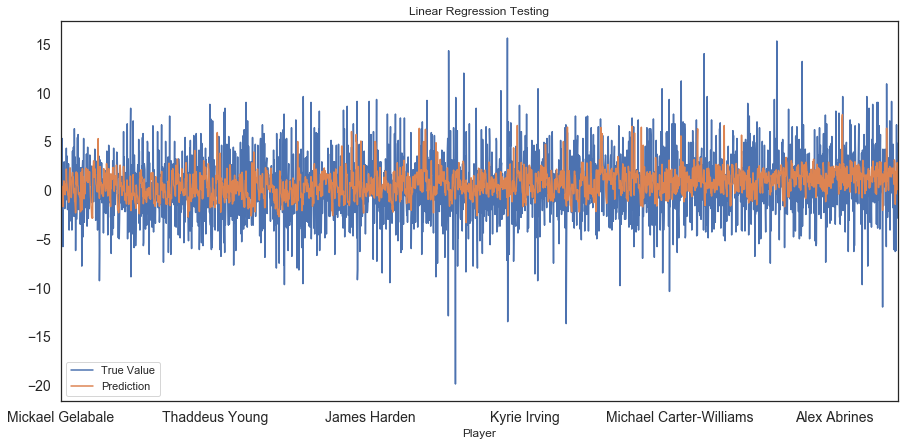

adj test r^2 = 0.04224748298840064
test mse = 10.495297652931615


In [92]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Extra Trees

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000, bootstrap=True)
reg.fit(train_x.values, train_y.PTS2.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

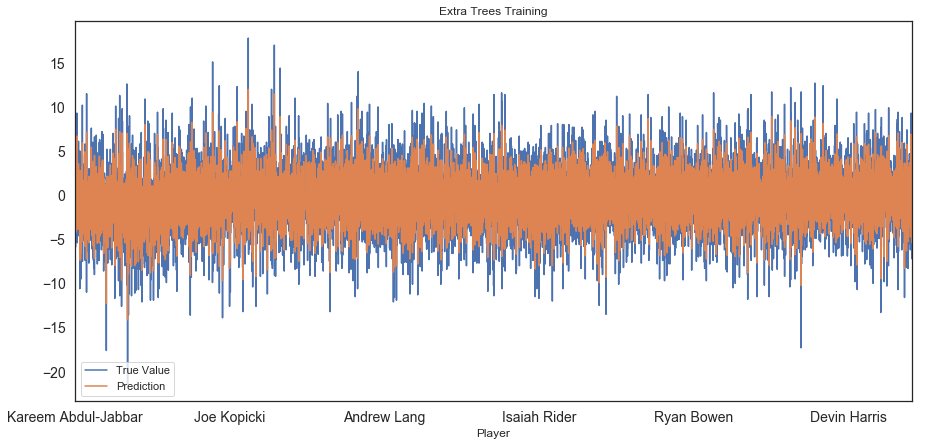

adj train r^2 = 0.8818351720004343
train mse = 1.2960420822416152


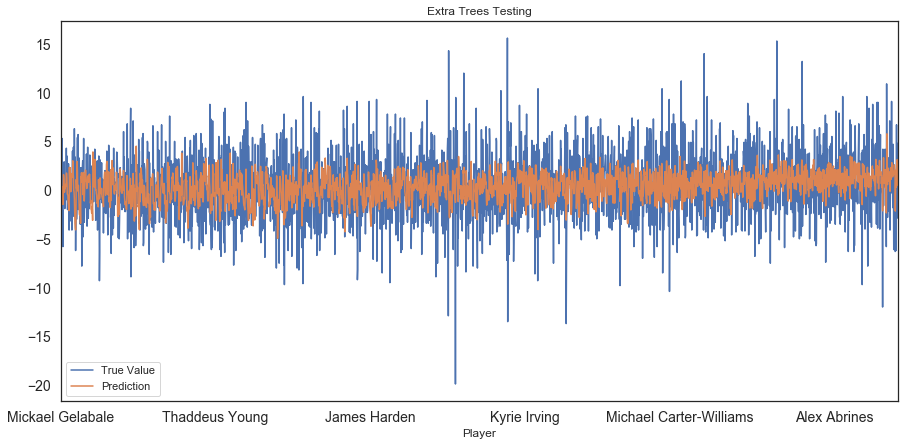

adj test r^2 = 0.06968671533504334
test mse = 10.194611509349834


In [94]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Random Forrest

In [95]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PTS2.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

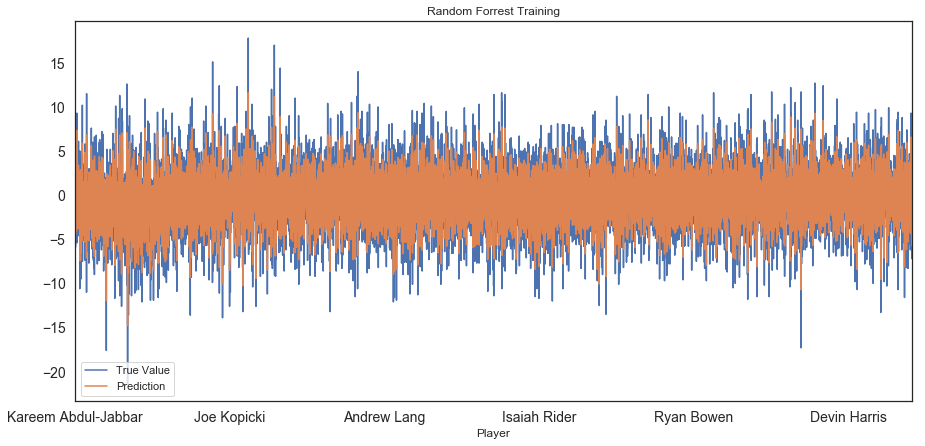

adj train r^2 = 0.882960176443027
train mse = 1.2837029359407008


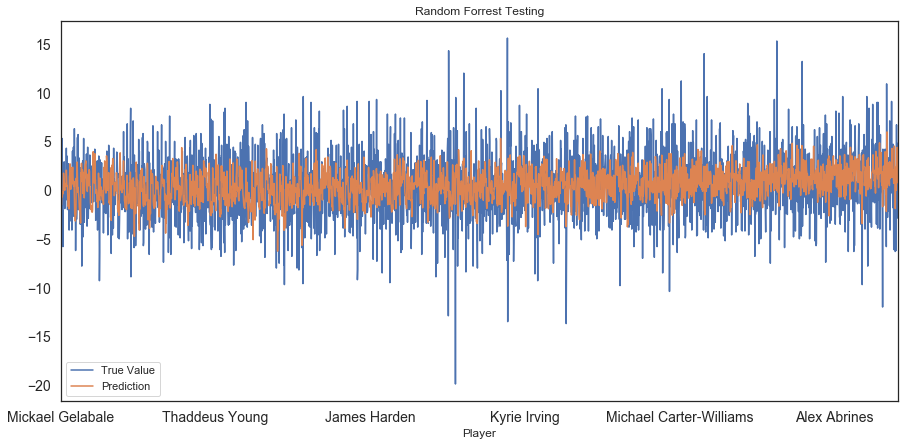

adj test r^2 = 0.06628601662686628
test mse = 10.231877237746582


In [96]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## XGBoost

In [97]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [98]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PTS2.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

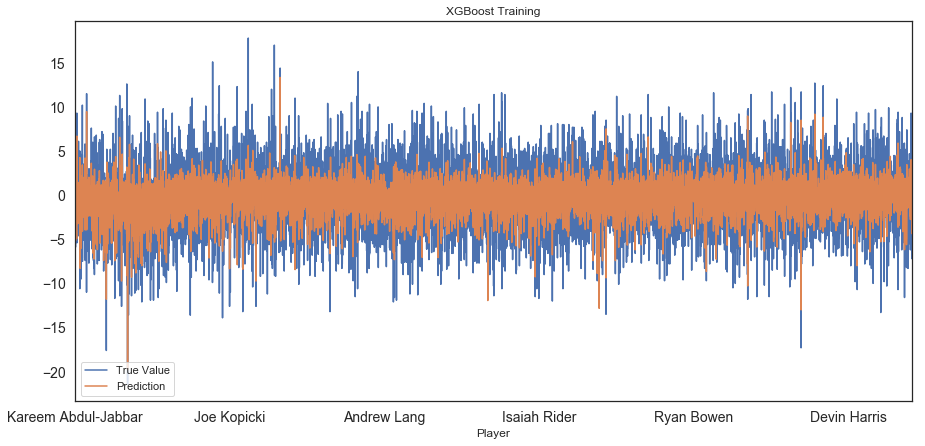

adj train r^2 = 0.4771987667330688
train mse = 5.734129270380252


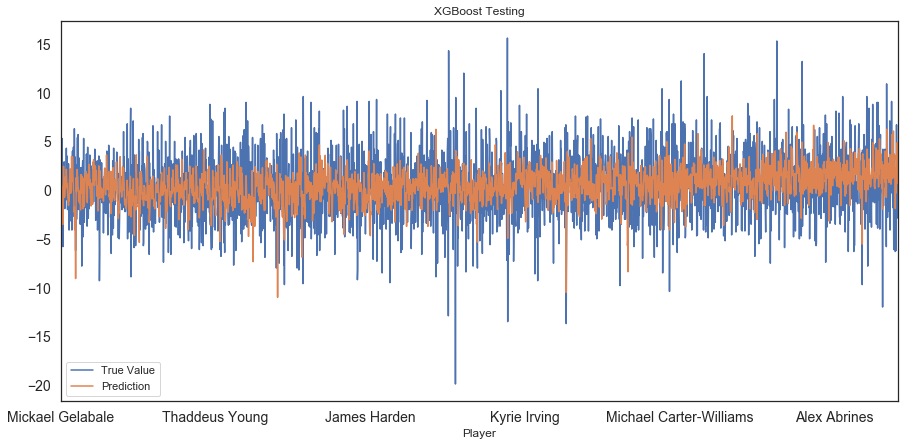

adj test r^2 = 0.05764678645318
test mse = 10.32654813712249


In [99]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Neural Network

In [100]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [101]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=69, activation='tanh'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.PTS2.values, validation_data=[test_x.values, test_y['PTS2'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

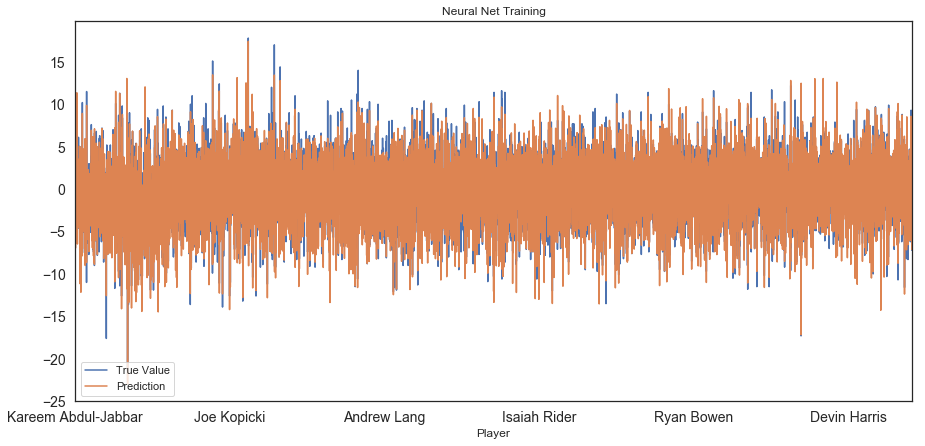

adj train r^2 = 0.7955524019891813
train mse = 2.2423989872537367


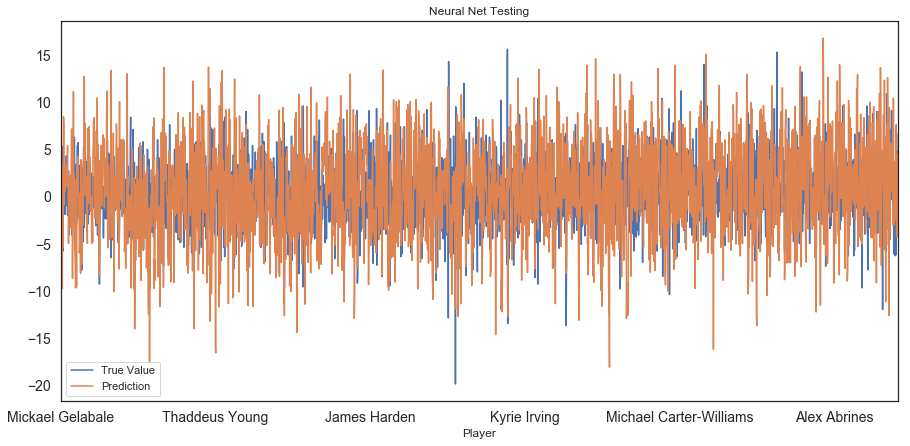

adj test r^2 = -1.8948700299481596
test mse = 31.722728044252204


In [102]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'Neural Net Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## LSTM

In [103]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [104]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(1, train_x.values.shape[1]), recurrent_activation='tanh'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PTS2.values.ravel(), validation_data=[X_tst_t, test_y['PTS2'].values.ravel()], epochs=50, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 10827 samples, validate on 2707 samples
Epoch 1/50
10827/10827 [==============================] - 5s 436us/step - loss: 0.6945 - val_loss: 0.7319
Epoch 2/50
10827/10827 [==============================] - 3s 268us/step - loss: 0.6408 - val_loss: 0.7127
Epoch 3/50
10827/10827 [==============================] - 3s 256us/step - loss: 0.6166 - val_loss: 0.7145
Epoch 4/50
10827/10827 [==============================] - 3s 253us/step - loss: 0.5997 - val_loss: 0.7229
Epoch 5/50
10827/10827 [==============================] - 3s 278us/step - loss: 0.5845 - val_loss: 0.7541
Epoch 6/50
10827/10827 [==============================] - 3s 271us/step - loss: 0.5690 - val_loss: 0.7571
Epoch 7/50
10827/10827 [==============================] - 3s 278us/step - loss: 0.5538 - val_loss: 0.7804
Epoch 8/50
10827/10827 [==============================] - 3s 264us/step - loss: 0.5375 - val_loss: 0.8018
Epoch 9/50
10827/10827 [==============================] - 3s 258us/step - loss: 0.5213 - val_loss: 0.81

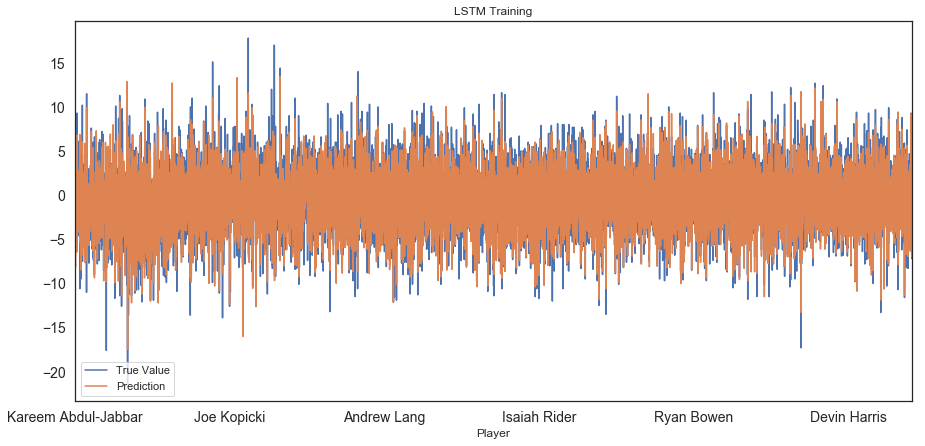

adj train r^2 = 0.7559964529768615
train mse = 2.676252066811035


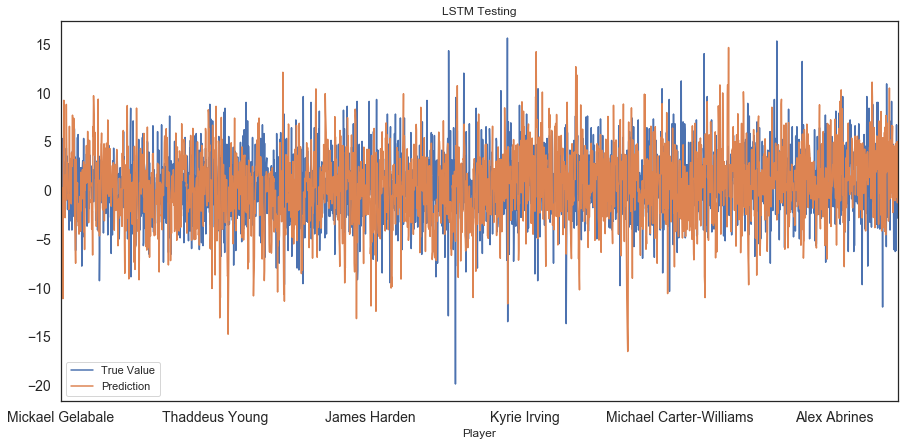

adj test r^2 = -0.9730799789155642
test mse = 21.621516314436466


In [105]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## TPOT

In [106]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(max_time_mins=1, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.PTS2.values.ravel())


1.0084484833333334 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(input_matrix, l1_ratio=1.0, tol=0.01)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=1, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=100,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

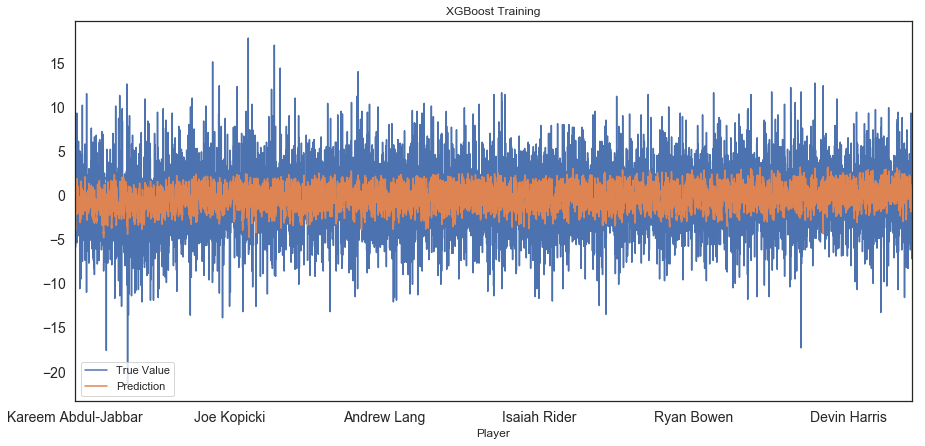

adj train r^2 = 0.15279094270725635
train mse = 9.29226242102835


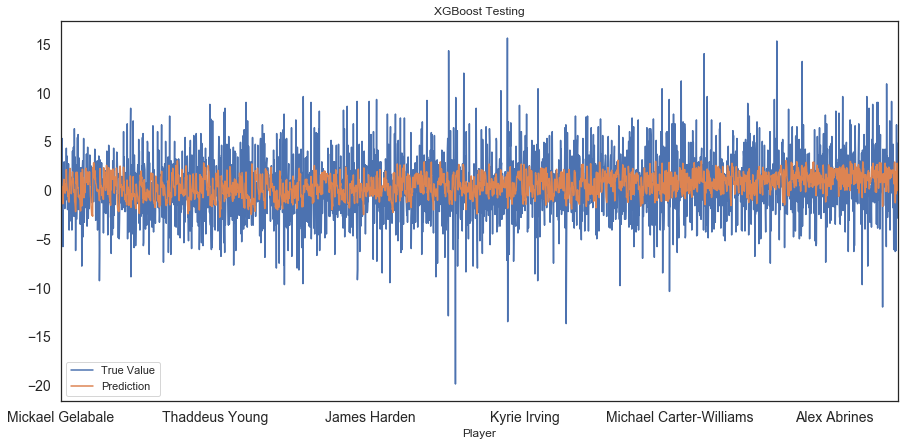

adj test r^2 = 0.1077015390980135
test mse = 9.77803532340463


In [107]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
test_y2['PTS2'] = sc2.inverse_transform(test_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))
test_y2['PTS2'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PTS2, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PTS2, test_y2.prediction)))

## Predictions

In [108]:
train=df3
test=df4
trains = np.split(train, [69], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [69], axis=1)
test_x=tests[0]
test_y=tests[1]

In [109]:
test_y.head()

,PTS2,BLK2,STL2,AST2,TRB2
Player,,,,,
Alex Abrines,-1.235935,-0.575075,-1.364558,-0.471374,-0.787385
Quincy Acy,-0.295444,-1.270775,-0.165243,-0.662082,-1.407102
Jaylen Adams,-0.687315,-0.227225,-1.064729,-1.710977,-0.973300
Steven Adams,-3.482666,-3.357875,-4.362845,-1.424915,-5.745122
Bam Adebayo,-2.176427,-2.662175,-2.563873,-1.997040,-4.381745


In [120]:
from sklearn.feature_selection import RFE
cols_at_end = ['TRB2','AST2','STL2','BLK2','PTS2']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    train_x3 = train_x
    test_x3 = test_x
    X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
    X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])
    K.clear_session()
    model_lstm = Sequential()
    model_lstm.add(LSTM(100, input_shape=(1, train_x.values.shape[1]), recurrent_activation='tanh'))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
    history_model_lstm = model_lstm.fit(X_tr_t, train_y[col].values.ravel(), validation_data=[X_tst_t, test_y[col].values.ravel()], epochs=20, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model_lstm.predict(X_tst_t))

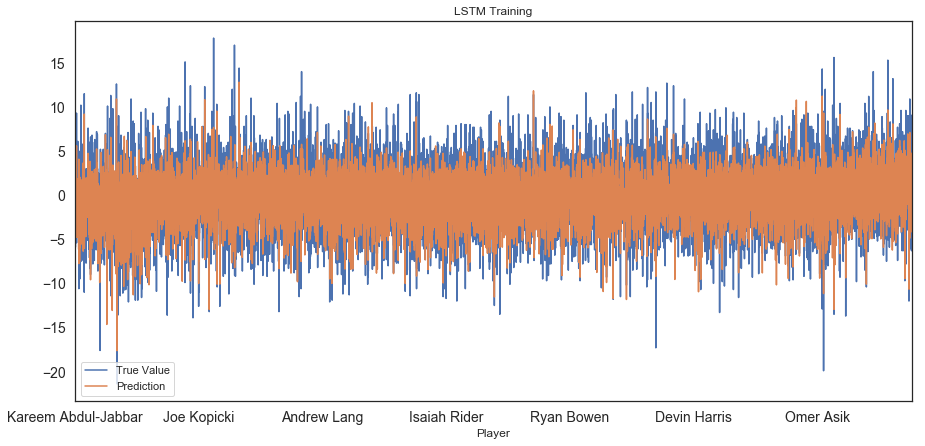

adj train r^2 = 0.5297863033070588
train mse = 5.208134208767727


In [122]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
train_y2['PTS2'] = sc2.inverse_transform(train_y2['PTS2'])
train_y2['PTS2'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PTS2, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PTS2, train_y2.prediction)))

In [123]:
test_y2['Improved'] = 1*test_y2['PTS2'] + 1.2*test_y2['TRB2'] + 1.5*test_y2['AST2'] + 3*test_y2['STL2'] + 3*test_y2['BLK2']
test_y2.sort_values('Improved', ascending=False).head(10)

,PTS2,BLK2,STL2,AST2,TRB2,Improved
Player,,,,,,
Vince Edwards,8.547590,0.413587,0.766558,0.966699,1.513445,15.354208
Isaac Bonga,6.809595,0.184532,0.419599,1.202982,2.182959,13.046011
Isaiah Hartenstein,5.567786,0.292498,0.273355,1.000689,3.351945,12.788711
Zhou Qi,4.601384,0.370898,0.448122,0.922316,3.357040,12.470364
Hamidou Diallo,4.771222,0.339294,0.352377,0.888924,3.122283,11.926363
Malik Beasley,6.203376,0.105619,0.259876,0.857404,1.482682,10.365184
Okaro White,6.051056,0.165488,0.368497,0.415955,1.643295,10.248899
Jarred Vanderbilt,5.044567,0.374679,0.288983,0.443905,2.065534,10.180050
Bam Adebayo,2.945477,0.326896,0.215038,0.980910,3.421342,10.148256


In [124]:
dftail = pd.read_csv('NBAFuturesTest1.csv')
dftail = dftail[['Player','PTS','TRB','AST','STL','BLK']]
dftail['Value'] = 1*dftail['PTS'] + 1.2*dftail['TRB'] + 1.5*dftail['AST'] + 3*dftail['STL'] + 3*dftail['BLK']
dftail = dftail.set_index('Player')
dftail.sort_values('Value', ascending=False).head(10)

,PTS,TRB,AST,STL,BLK,Value
Player,,,,,,
James Harden,36.1,6.6,7.5,2.0,0.7,63.37
Giannis Antetokounmpo,27.7,12.5,5.9,1.3,1.5,59.95
Russell Westbrook,22.9,11.1,10.7,1.9,0.5,59.47
Anthony Davis,25.9,12.0,3.9,1.6,2.4,58.15
Joel Embiid,27.5,13.6,3.7,0.7,1.9,57.17
LeBron James,27.4,8.5,8.3,1.3,0.6,55.75
Karl-Anthony Towns,24.4,12.4,3.4,0.9,1.6,51.88
Paul George,28.0,8.2,4.1,2.2,0.4,51.79
Nikola Jokic,20.1,10.8,7.3,1.4,0.7,50.31


In [125]:
test_y2['Value'] = test_y2['Improved'] + dftail['Value']
test_y2.sort_values('Value', ascending=False).head(20)

,PTS2,BLK2,STL2,AST2,TRB2,Improved,Value
Player,,,,,,,
Joel Embiid,3.373726,-0.337603,0.191351,1.095128,2.444220,7.510725,64.680725
Giannis Antetokounmpo,1.875441,0.052202,-0.356486,1.293776,1.382527,4.562285,64.512285
Russell Westbrook,4.270945,-0.375990,-0.410158,-1.246100,0.155974,0.230519,59.700519
James Harden,-3.136623,-0.121449,-0.433488,-0.628915,-0.376052,-6.196069,57.173931
Anthony Davis,4.509308,-0.569312,0.121128,-2.868310,-0.465281,-1.696047,56.453953
Karl-Anthony Towns,1.511083,-0.164458,0.055212,0.307763,-0.100036,1.524946,53.404946
Nikola Jokic,-0.140096,0.087737,0.171694,0.985054,0.542027,2.766211,53.076211
Bradley Beal,2.587354,0.110309,0.221011,0.245465,1.345696,5.564347,52.014347
Nikola Vucevic,0.886850,-0.038688,0.244055,1.083116,-0.366504,2.687821,49.887821


In [128]:
test_y2['Value2'] = test_y2['Improved']* dftail['Value']
test_y2.sort_values('Value2', ascending=False).head(20)

,PTS2,BLK2,STL2,AST2,TRB2,Improved,Value,Value2
Player,,,,,,,,
Joel Embiid,3.373726,-0.337603,0.191351,1.095128,2.444220,7.510725,64.680725,429.388177
Joe Ingles,6.077260,0.226764,-0.152085,0.337973,2.553647,9.872632,39.522632,292.723540
Giannis Antetokounmpo,1.875441,0.052202,-0.356486,1.293776,1.382527,4.562285,64.512285,273.508983
Bam Adebayo,2.945477,0.326896,0.215038,0.980910,3.421342,10.148256,36.208256,264.463559
Bradley Beal,2.587354,0.110309,0.221011,0.245465,1.345696,5.564347,52.014347,258.463908
Dennis Schroder,3.807566,0.079156,0.350620,1.748677,0.789271,8.667033,37.637033,251.083952
Malik Beasley,6.203376,0.105619,0.259876,0.857404,1.482682,10.365184,28.865184,191.755901
Collin Sexton,3.669318,0.134429,0.458451,0.473832,0.758168,7.068509,33.548509,187.174108
Ed Davis,3.555222,0.169923,0.468337,1.726594,0.727136,8.932455,28.652455,176.148014
